In [1]:
import cv2
import numpy as np
from skimage import io
from skimage.color import rgb2gray, rgb2hsv, rgba2rgb, hsv2rgb
from skimage import img_as_ubyte
import matplotlib.pyplot as plt
from skimage.exposure import histogram


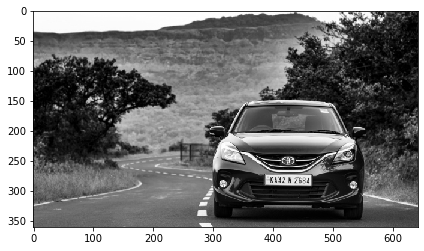

In [2]:
img_original = io.imread("./farCars/toyota-glanza-front-view-62.jpeg")
img = rgb2gray(img_original)
io.imshow(img)

/home/kali/miniconda3/lib/python3.9/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


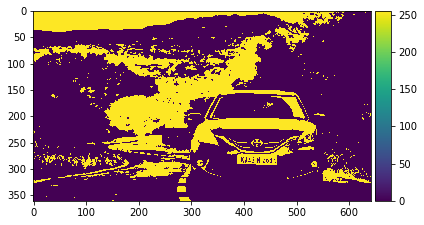

In [3]:
new_img = np.where(img > 0.5, 255, 0)
io.imshow(new_img)

/home/kali/miniconda3/lib/python3.9/site-packages/skimage/util/dtype.py:531: UserWarning: Downcasting int64 to uint8 without scaling because max value 255 fits in uint8
  return _convert(image, np.uint8, force_copy)


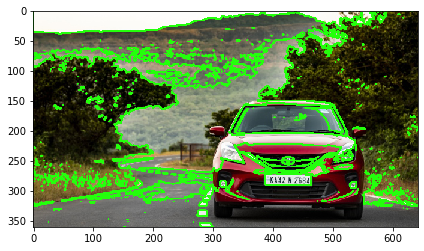

In [4]:
contours, _ = cv2.findContours(img_as_ubyte(new_img), mode=cv2.RETR_EXTERNAL,
                               method=cv2.CHAIN_APPROX_NONE)
temp = img_as_ubyte(img_original)
cv2.drawContours(temp, contours, -1, (36, 255, 12), 2)
io.imshow(temp)


In [5]:
# Print Images List
def show_images(images,titles=None):
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        plt.axis('off')
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show() 

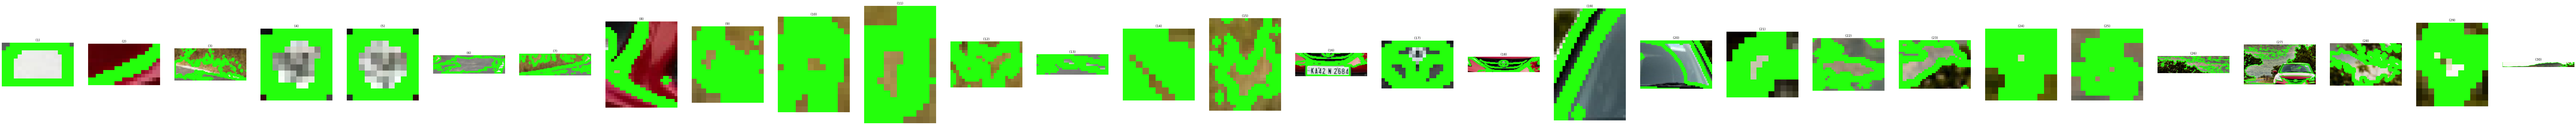

In [6]:
imgs = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    if w>10 and h> 10:
        roi = img_original[y:y + h, x:x + w]
        imgs.append(roi)

show_images(imgs)
# for i in range(len(imgs)):
#     x = imgs[i]
#     try:
#         x = rgba2rgb(x)
#     except Exception as e:
#         pass
#     imgs[i] = rgb2hsv(x)
    
# show_images(imgs[90:-1])
# print(histogram(imgs[0]))